In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [2]:
#Read file into df

df = pd.read_csv("cleaned.csv", low_memory=False)
df

,fancyname,company,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,Downloads,categorygame,low_price_item,top_price_item,price,paidapp,rating,numberreviews,cleaned_numberReviews
0,Online Soccer Manager (OSM),gamebasics bv,1.0,1.0,0.0,0.0,0.0,1.0,1,everyone,0.0,10000000.0,sports,0.59,109.99,free,0.0,4.5,"1,656,120",1656120
1,Hungry Shark Evolution,ubisoft entertainment,1.0,1.0,0.0,0.0,0.0,0.0,1,16+,0.0,100000000.0,arcade,2.29,109.99,free,0.0,4.5,"6,495,234",6495234
2,Zynga Poker ? Free Texas Holdem Online Card Games,zynga,1.0,1.0,1.0,0.0,0.0,1.0,1,12+,0.0,50000000.0,casino,0.59,350.00,free,0.0,4.5,"2,315,552",2315552
3,Sudoku - The Clean One,dustland design,1.0,1.0,0.0,0.0,0.0,0.0,1,everyone,0.0,1000000.0,puzzle,1.89,2.99,free,0.0,4.6,"6,639",6639
4,8 Ball Pool,miniclip.com,1.0,1.0,0.0,0.0,0.0,0.0,1,everyone,0.0,500000000.0,sports,0.79,99.99,free,0.0,4.5,"17,053,699",17053699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,TETRIS Blitz,electronic arts,1.0,0.0,0.0,0.0,0.0,0.0,1,everyone,0.0,10000000.0,puzzle,1.09,109.99,free,0.0,4.2,"250,381",250381
7901,Worms 2: Armageddon,team 17 digital limited,0.0,0.0,0.0,0.0,0.0,0.0,1,7+,0.0,1000000.0,strategy,NaN,NaN,4.49,1.0,3.9,"61,603",61603
7902,Harry Potter: Wizards Unite,"niantic, inc.",1.0,0.0,0.0,0.0,0.0,0.0,1,7+,0.0,5000000.0,adventure,1.09,109.99,free,0.0,3.9,"268,773",268773
7903,Small World 2,no info,NaN,NaN,NaN,NaN,NaN,NaN,1,no info,0.0,NaN,board,NaN,NaN,free,0.0,4.3,5.66k+,5660


In [3]:
ColumnsToDrop = [
    'Downloads',
    'fancyname',
    'company',
    'low_price_item',
    'top_price_item',
    'price',
    'numberreviews',
    'cleaned_numberReviews',
    'game'
]
df_selectedColumns = df.drop(ColumnsToDrop,axis=1)
df_selectedColumns

,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,age_rating,Parentalguidance,categorygame,paidapp,rating
0,1.0,1.0,0.0,0.0,0.0,1.0,everyone,0.0,sports,0.0,4.5
1,1.0,1.0,0.0,0.0,0.0,0.0,16+,0.0,arcade,0.0,4.5
2,1.0,1.0,1.0,0.0,0.0,1.0,12+,0.0,casino,0.0,4.5
3,1.0,1.0,0.0,0.0,0.0,0.0,everyone,0.0,puzzle,0.0,4.6
4,1.0,1.0,0.0,0.0,0.0,0.0,everyone,0.0,sports,0.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...
7900,1.0,0.0,0.0,0.0,0.0,0.0,everyone,0.0,puzzle,0.0,4.2
7901,0.0,0.0,0.0,0.0,0.0,0.0,7+,0.0,strategy,1.0,3.9
7902,1.0,0.0,0.0,0.0,0.0,0.0,7+,0.0,adventure,0.0,3.9
7903,NaN,NaN,NaN,NaN,NaN,NaN,no info,0.0,board,0.0,4.3


In [4]:
# Encode categorical columns

df_encoded = pd.get_dummies(df_selectedColumns, columns=['age_rating', 'categorygame'])

df_encoded

,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,Parentalguidance,paidapp,rating,age_rating_12+,...,categorygame_educational,categorygame_music,categorygame_puzzle,categorygame_racing,categorygame_role playing,categorygame_simulation,categorygame_sports,categorygame_strategy,categorygame_trivia,categorygame_word
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.5,0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.5,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2,0,...,0,0,1,0,0,0,0,0,0,0
7901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0,...,0,0,0,0,0,0,0,1,0,0
7902,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9,0,...,0,0,0,0,0,0,0,0,0,0
7903,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.3,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Drop any NaN rows of data

df_encoded_nonNA = df_encoded.dropna()

In [6]:
# Set X and y variables for analysis

X = df_encoded_nonNA.drop('rating',axis=1)
y = df_encoded_nonNA['rating']

In [7]:
# Find out p-value breakdown of independent variables

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     32.16
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          2.58e-155
Time:                        13:14:25   Log-Likelihood:                -3222.7
No. Observations:                7023   AIC:                             6501.
Df Residuals:                    6995   BIC:                             6693.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [8]:
X.describe()

,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,Parentalguidance,paidapp,age_rating_12+,age_rating_16+,...,categorygame_educational,categorygame_music,categorygame_puzzle,categorygame_racing,categorygame_role playing,categorygame_simulation,categorygame_sports,categorygame_strategy,categorygame_trivia,categorygame_word
count,7023.000000,7023.000000,7023.000000,7023.000000,7023.0,7023.000000,7023.00000,7023.000000,7023.000000,7023.000000,...,7023.000000,7023.00000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000
mean,0.763207,0.830842,0.023494,0.010252,0.0,0.156343,0.00057,0.046561,0.147088,0.043429,...,0.035028,0.01310,0.133704,0.048270,0.054820,0.141393,0.054108,0.058949,0.019792,0.021501
std,0.425145,0.374919,0.151478,0.100739,0.0,0.363206,0.02386,0.210712,0.354219,0.203835,...,0.183863,0.11371,0.340358,0.214351,0.227645,0.348451,0.226247,0.235546,0.139295,0.145057
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X)
X_scaled = X_scaler.transform(X)

X2_scaled = sm.add_constant(X_scaled)
est_scaled = sm.OLS(y, X2_scaled)
est2_scaled = est.fit()
print(est2_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     32.16
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          2.58e-155
Time:                        13:14:25   Log-Likelihood:                -3222.7
No. Observations:                7023   AIC:                             6501.
Df Residuals:                    6995   BIC:                             6693.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [46]:
X.columns

Index(['purchases', 'ads', 'sharesinfo', 'shareslocation',
       'unrestrictedinternet', 'usersinteract', 'Parentalguidance', 'paidapp',
       'age_rating_12+', 'age_rating_16+', 'age_rating_18+', 'age_rating_7+',
       'age_rating_everyone', 'age_rating_no info', 'categorygame_action',
       'categorygame_adventure', 'categorygame_arcade', 'categorygame_board',
       'categorygame_card', 'categorygame_casino', 'categorygame_casual',
       'categorygame_educational', 'categorygame_music', 'categorygame_puzzle',
       'categorygame_racing', 'categorygame_role playing',
       'categorygame_simulation', 'categorygame_sports',
       'categorygame_strategy', 'categorygame_trivia', 'categorygame_word'],
      dtype='object')

In [42]:
contingency_table = pd.crosstab(df_encoded_nonNA['rating'], df_encoded_nonNA['purchases'])
#                                                              df_encoded_nonNA['ads'], df_encoded_nonNA['sharesinfo'],df_encoded_nonNA['shareslocation'],\
#                                                             df_encoded_nonNA['unrestrictedinternet'],df_encoded_nonNA['usersinteract'], \
#                                                             df_encoded_nonNA['Parentalguidance'],df_encoded_nonNA['paidapp'],df_encoded_nonNA['age_rating_12+'], \
#                                                             df_encoded_nonNA['age_rating_16+'],df_encoded_nonNA['age_rating_18+'],df_encoded_nonNA['age_rating_7+'], \
#                                                             df_encoded_nonNA['age_rating_everyone'],df_encoded_nonNA['age_rating_no info'],df_encoded_nonNA['categorygame_action'], \
#                                                             df_encoded_nonNA['categorygame_adventure'],df_encoded_nonNA['categorygame_arcade'],df_encoded_nonNA['categorygame_board'], \
#                                                             df_encoded_nonNA['categorygame_card'],df_encoded_nonNA['categorygame_casino'],df_encoded_nonNA['categorygame_casual'], \
#                                                             df_encoded_nonNA['categorygame_educational'],df_encoded_nonNA['categorygame_music'],df_encoded_nonNA['categorygame_puzzle'],\
#                                                             df_encoded_nonNA['categorygame_racing'],df_encoded_nonNA['categorygame_role playing'],df_encoded_nonNA['categorygame_simulation'],\
#                                                             df_encoded_nonNA['categorygame_sports'],df_encoded_nonNA['categorygame_strategy'],df_encoded_nonNA['categorygame_trivia'],df_encoded_nonNA['categorygame_word']])


print(contingency_table)

purchases  0.0  1.0
rating             
1.5          1    0
1.7          1    0
1.9          1    1
2.0          1    0
2.1          0    1
2.2          1    2
2.3          2    3
2.4          2    4
2.5          9    4
2.6          4    8
2.7          7    6
2.8         10   14
2.9         15   22
3.0         16   19
3.1         20   25
3.2         26   20
3.3         25   43
3.4         36   40
3.5         48   78
3.6         44   97
3.7         65  130
3.8         79  204
3.9        113  281
4.0        121  375
4.1        121  424
4.2        147  605
4.3        183  736
4.4        174  707
4.5        152  680
4.6        127  486
4.7         84  248
4.8         25   90
4.9          3    7


In [43]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')


dof=32
[[2.36793393e-01 7.63206607e-01]
 [2.36793393e-01 7.63206607e-01]
 [4.73586786e-01 1.52641321e+00]
 [2.36793393e-01 7.63206607e-01]
 [2.36793393e-01 7.63206607e-01]
 [7.10380179e-01 2.28961982e+00]
 [1.18396697e+00 3.81603303e+00]
 [1.42076036e+00 4.57923964e+00]
 [3.07831411e+00 9.92168589e+00]
 [2.84152072e+00 9.15847928e+00]
 [3.07831411e+00 9.92168589e+00]
 [5.68304144e+00 1.83169586e+01]
 [8.76135555e+00 2.82386445e+01]
 [8.28776876e+00 2.67122312e+01]
 [1.06557027e+01 3.43442973e+01]
 [1.08924961e+01 3.51075039e+01]
 [1.61019507e+01 5.18980493e+01]
 [1.79962979e+01 5.80037021e+01]
 [2.98359675e+01 9.61640325e+01]
 [3.33878684e+01 1.07612132e+02]
 [4.61747117e+01 1.48825288e+02]
 [6.70125303e+01 2.15987470e+02]
 [9.32965969e+01 3.00703403e+02]
 [1.17449523e+02 3.78550477e+02]
 [1.29052399e+02 4.15947601e+02]
 [1.78068632e+02 5.73931368e+02]
 [2.17613128e+02 7.01386872e+02]
 [2.08614979e+02 6.72385021e+02]
 [1.97012103e+02 6.34987897e+02]
 [1.45154350e+02 4.67845650e+02]
 [7

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('y ~ X',
                data=df_encoded_nonNA).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)


                 sum_sq      df             F  PR(>F)
X         136438.049573    31.0  29904.328934     0.0
Residual    1029.502644  6995.0           NaN     NaN


C:\Users\CALVIN\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 31, but rank is 28
  warnings.warn('covariance of constraints does not have full '


C:\Users\CALVIN\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


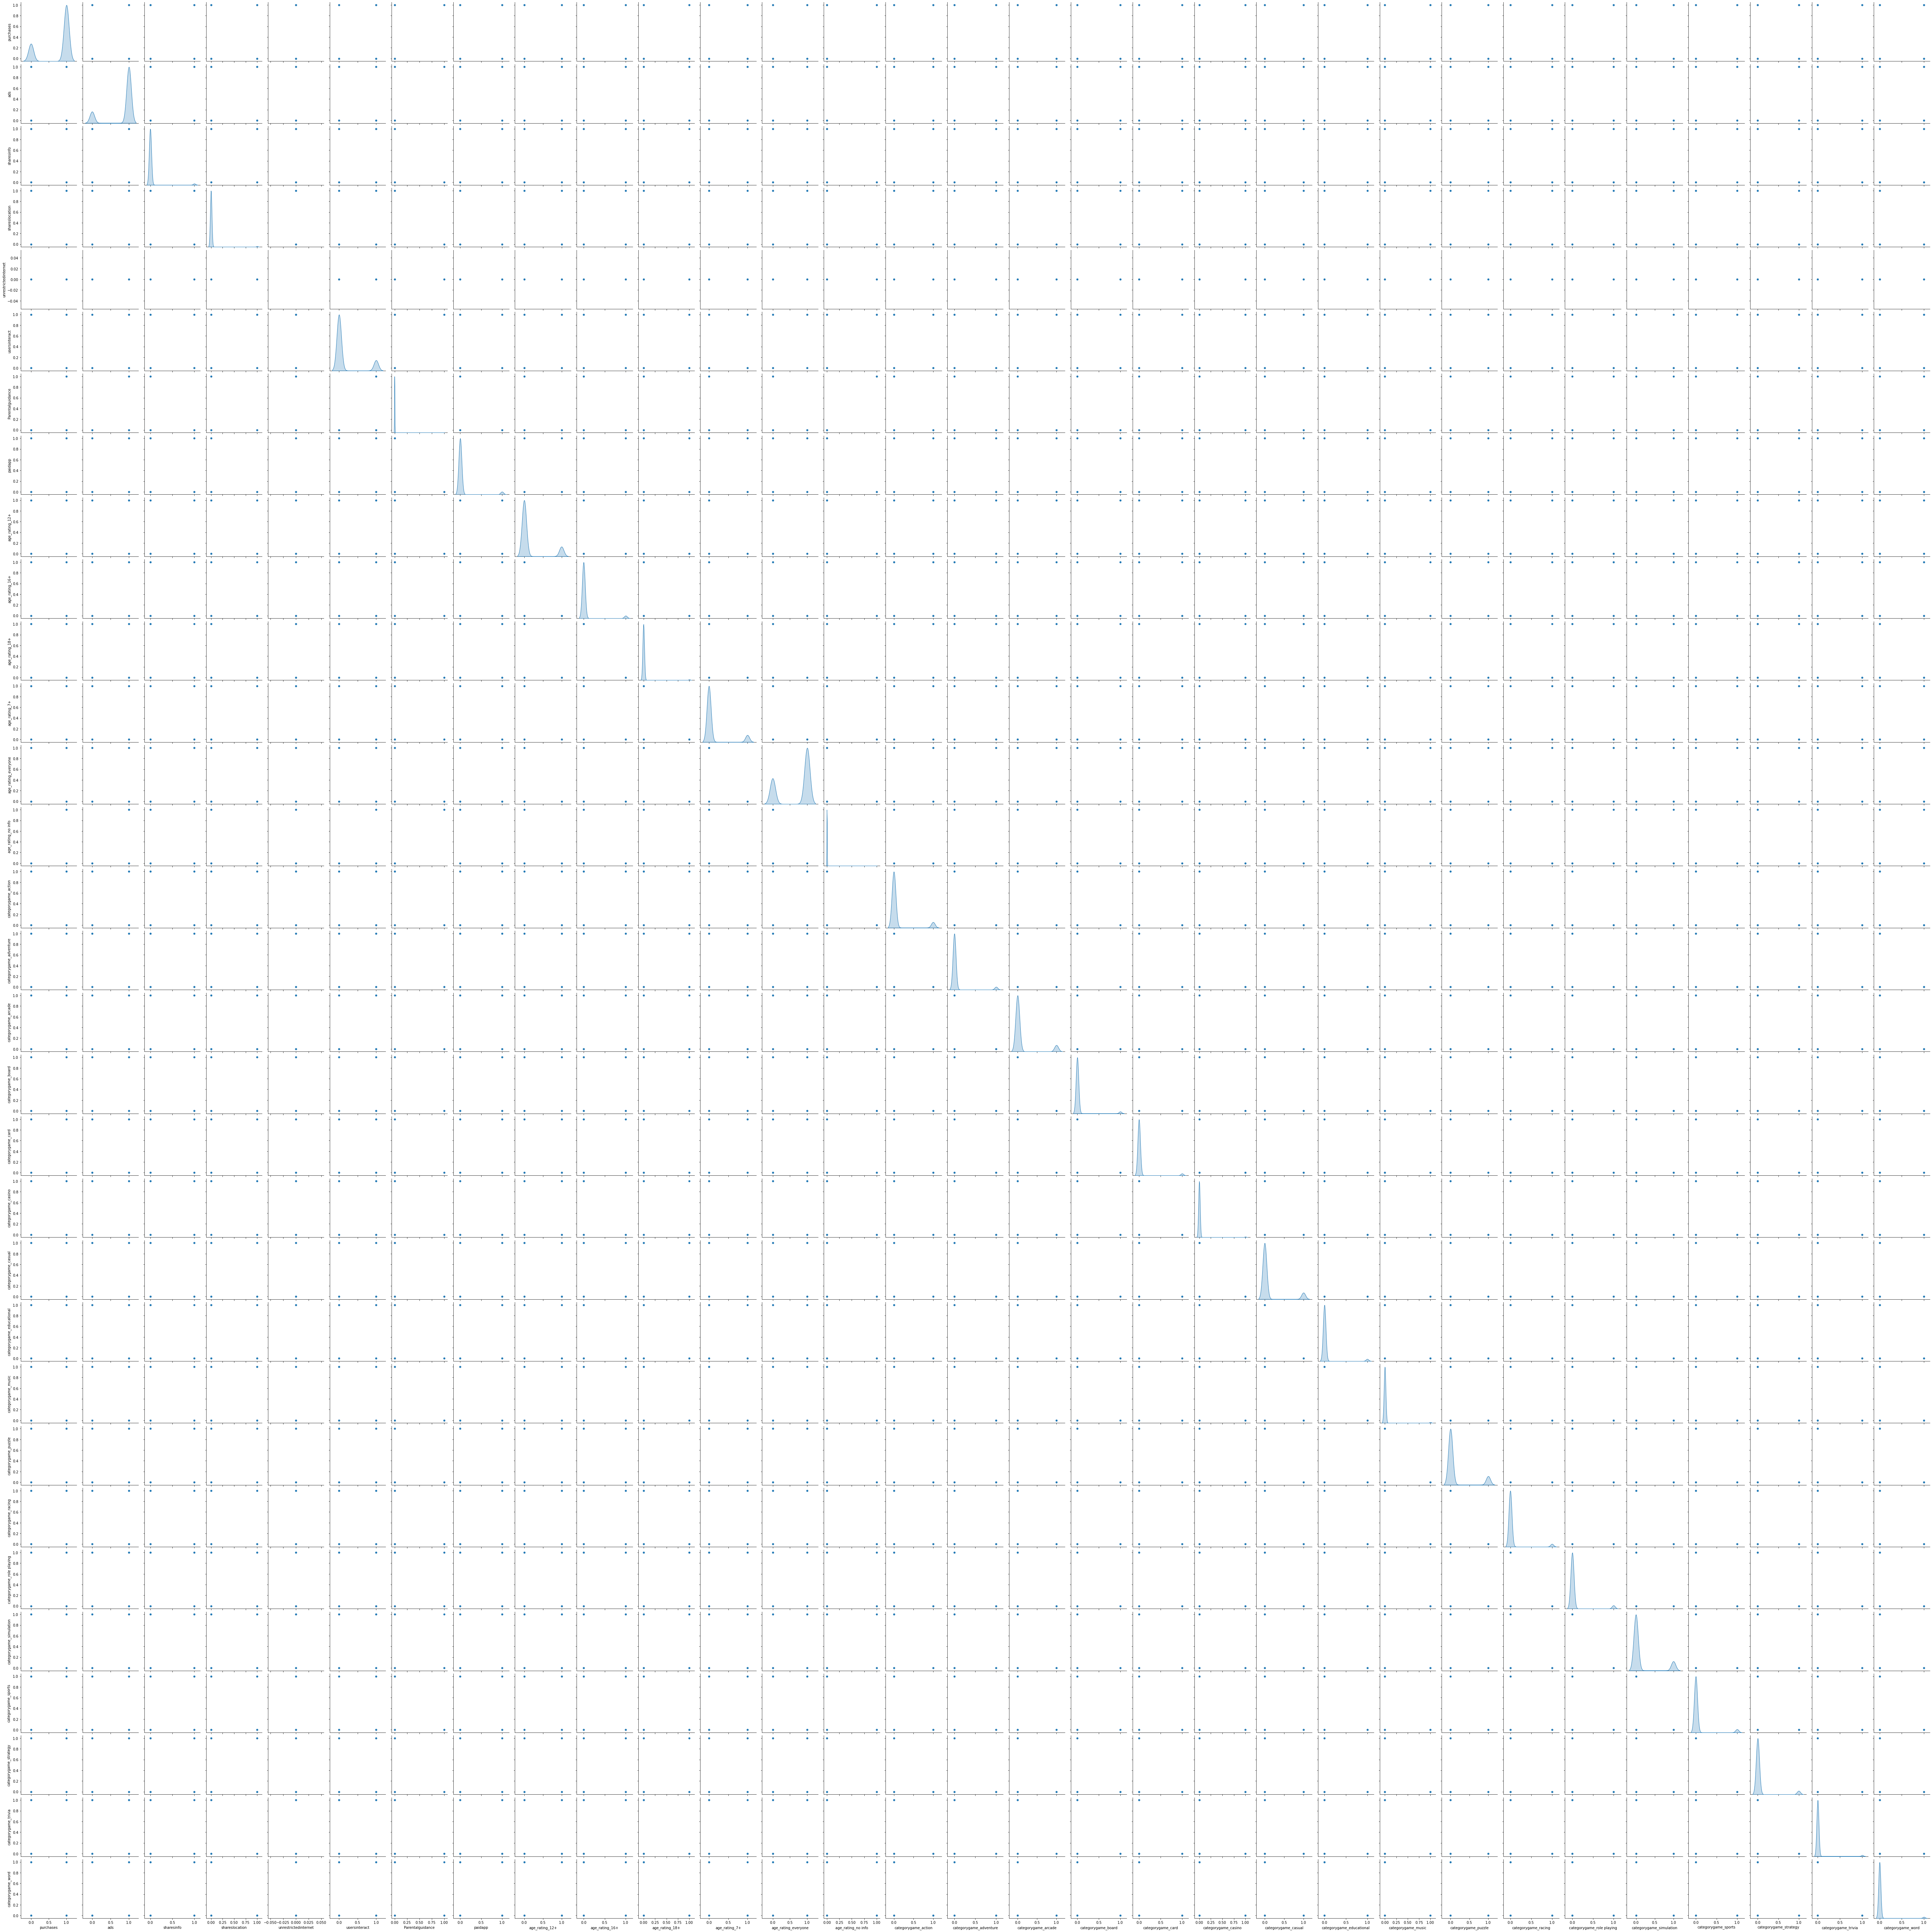

In [49]:
import seaborn as sns

sns.pairplot(X, diag_kind='kde')